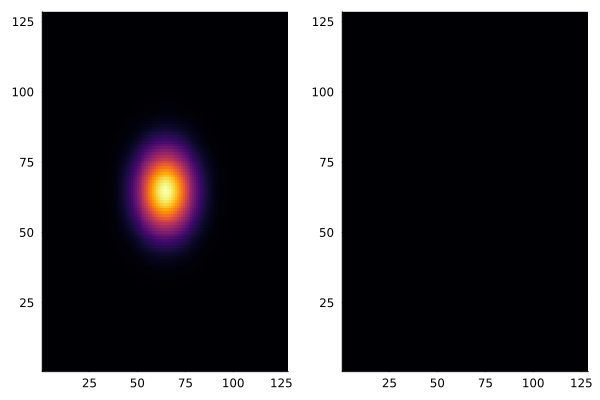

In [1]:
using SLMTools, Images, Statistics,Plots
N = 1024
NSLM = 1024
gauss = makeGaussian((N, N), 5)
mu0=gauss .^ 2
mu = downsample(gauss .^ 2, 8) # Make a 8x downsampled image
mu ./= sum(mu) # Normalize by total intensity
p1=plotBeamMap(mu)

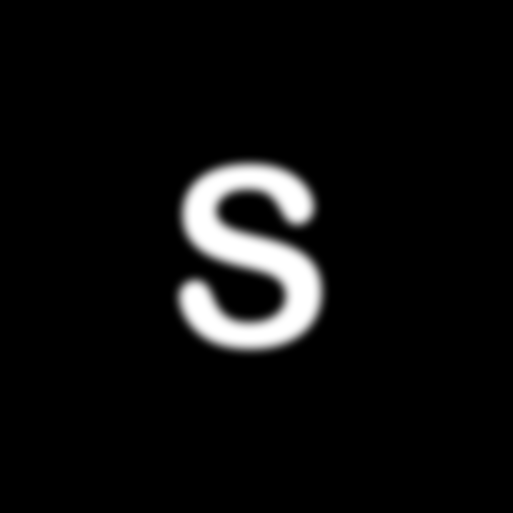

In [22]:
tw = 500 # size of target feature
NT = 1024
word = "S"
txt = hcat([makeLetter(i, (tw, tw))[:, (i == 'I' ? (floor(Int, 0.35 * tw):floor(Int, 0.65 * tw)) : (floor(Int, 0.2 * tw):floor(Int, 0.85 * tw)))] for i in word]...)
arr = zeros(typeof(txt[1]), NT, NT)
arr[CartesianIndices(size(txt)).+CartesianIndex((size(arr) .- size(txt)) .÷ 2).+0*CartesianIndex(N ÷ 4, 0)] .= txt
arr = imfilter(arr, Kernel.gaussian(10))

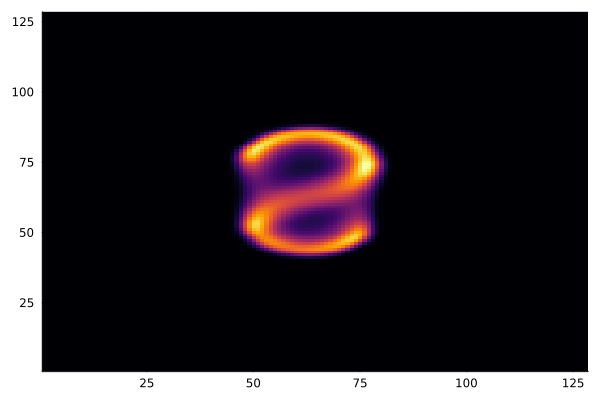

In [23]:
v = downsample(arr, 8; reducer=mean) |> itfa
v ./= sum(v)
L = natlat((128, 128))
phi1 = OTphase(mu, L, v, L, 0.001)
mu_new = sft(sqrt.(mu) .* exp.(2pi * im * phi1)) .^ 2 |> nabs
p2 = hm(mu_new)


In [24]:
slm_bitmap=Int.(floor.(ramp.((phi1.*256) .% 256)))
println(slm_bitmap |> maximum)
slm_bitmap |> minimum

255


0

In [25]:
minimum(phi1)

-0.019099886402194954